In [0]:
import numpy as np
from sklearn import datasets, metrics, svm
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

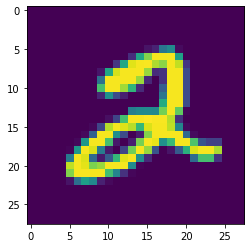

In [3]:
mnist = datasets.fetch_openml('mnist_784', version=1)
x,y = datasets.fetch_openml('mnist_784', version=1, return_X_y=True)

img = x.reshape(x.shape[0], 28, 28)
plt.imshow(img[5])

In [5]:
n_data = len(y)
test_x, train_x = x[n_data//4*3:], x[:-n_data//4]
test_y, train_y = y[n_data//4*3:], y[:-n_data//4]
print('Train: {}\nTest: {}'.format(len(train_y), len(test_y)))

Train: 52500
Test: 17500


In [0]:
train_x, test_x = train_x / 255., test_x / 255.
train_y, test_y = train_y.astype('int'), test_y.astype('int')

In [0]:
pca = PCA(n_components=2)
trans_x_train = pca.fit_transform(train_x)

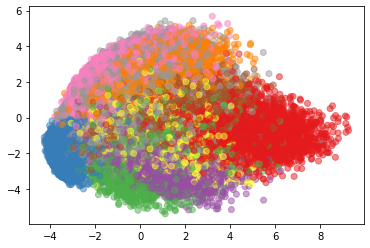

In [8]:
pca = PCA(n_components=2)
view = pca.fit_transform(train_x)
plt.scatter(view[:,0], view[:,1], c=train_y, alpha=0.5, cmap='Set1')

In [9]:
SVM = svm.SVC(degree=1)
SVM.fit(view, train_y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=1, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [10]:
trans_x_test = pca.transform(test_x)
pred = SVM.predict(trans_x_test)
report = metrics.classification_report(test_y, pred)
print(report)

              precision    recall  f1-score   support

           0       0.63      0.80      0.71      1719
           1       0.86      0.95      0.90      1929
           2       0.42      0.21      0.28      1787
           3       0.56      0.52      0.54      1790
           4       0.36      0.57      0.44      1735
           5       0.24      0.11      0.15      1574
           6       0.34      0.49      0.40      1672
           7       0.50      0.50      0.50      1844
           8       0.31      0.39      0.34      1721
           9       0.34      0.14      0.20      1729

    accuracy                           0.48     17500
   macro avg       0.46      0.47      0.45     17500
weighted avg       0.46      0.48      0.45     17500



In [0]:
pc_tsne = PCA(16)
tsne = TSNE(n_components=2)
x_trans = pc_tsne.fit_transform(x)
embed_x = tsne.fit_transform(x_trans)

In [0]:
embed_x_train, embed_x_test = embed_x[:3*n_data//4], embed_x[-n_data//4:]

In [13]:
SVM = svm.SVC(degree=1)
SVM.fit(embed_x_train, train_y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=1, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [14]:
pred = SVM.predict(embed_x_test)
report = metrics.classification_report(test_y, pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1719
           1       0.98      0.99      0.98      1929
           2       0.97      0.97      0.97      1787
           3       0.94      0.93      0.94      1790
           4       0.96      0.92      0.94      1735
           5       0.91      0.95      0.93      1574
           6       0.97      0.98      0.97      1672
           7       0.97      0.95      0.96      1844
           8       0.94      0.92      0.93      1721
           9       0.89      0.92      0.91      1729

    accuracy                           0.95     17500
   macro avg       0.95      0.95      0.95     17500
weighted avg       0.95      0.95      0.95     17500



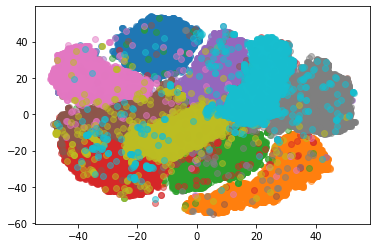

In [30]:
for i in range(10):
  d = embed_x_train[np.where(train_y==i)]
  plt.scatter(d[:,0], d[:,1], alpha=0.5, cmap='Set1')